In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib inline

In [2]:
# Currency pair exchange rates for CAD/JPY
CAD_JPY = pd.read_csv(("cad_jpy.csv"), index_col="Date", infer_datetime_format = True, parse_dates = True)
CAD_JPY.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
CAD_JPY = CAD_JPY.loc["1990-01-01":, :]
CAD_JPY.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:xlabel='Date'>

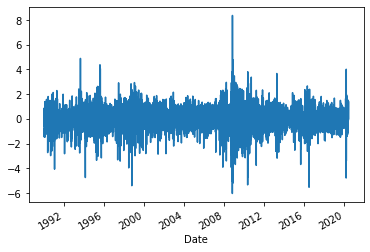

In [4]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
Returns= CAD_JPY.Price.pct_change()*100
Returns.plot()

In [5]:
# Create a lagged return using the shift function
CAD_JPY["Returns"]=Returns.copy()
CAD_JPY["Lagged_Return"] = Returns.shift()
CAD_JPY=CAD_JPY.dropna()
CAD_JPY.tail()

,Price,Open,High,Low,Returns,Lagged_Return
Date,,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756
2020-06-03,80.70,80.40,80.82,79.96,0.373134,1.425508
2020-06-04,80.71,80.80,80.89,80.51,0.012392,0.373134


In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
Train = CAD_JPY[:'2017']
Test = CAD_JPY["2018":]

In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_Train = Train["Lagged_Return"].to_frame()
X_Test = Test["Lagged_Return"].to_frame()
Y_Train = Train["Returns"]
Y_Test = Test["Returns"] 

In [8]:
X_Train

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
...,...
2017-12-25,-0.011240
2017-12-26,0.033723
2017-12-27,0.269693


In [9]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

In [10]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_Train, Y_Train)

LinearRegression()

In [11]:
# Make a prediction of "y" values using just the test dataset 
#CAD_JPY['Lagged_Return'].values.reshape(1,-1)
Y_Predictions=Linear_Regression.predict(X_Test)


In [12]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = Y_Test.to_frame()
Results["Predicted Returns"] = Y_Predictions
Results.head(2)

,Returns,Predicted Returns
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

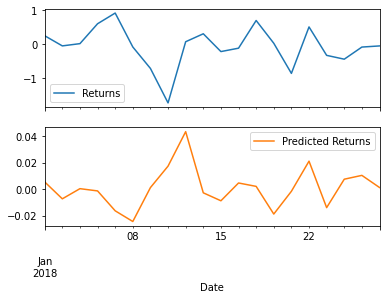

In [13]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

In [21]:
# Out-of-Sample Performance
from sklearn.metrics import mean_squared_error
mean_squared_error1=mean_squared_error(Results["Returns"], Results["Predicted Returns"])


In [22]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
root_mean_squared_error = np.sqrt(mean_squared_error1)
root_mean_squared_error

0.6445805658569028

In [23]:
# In-Sample Performance
# Construct a dataframe using just the "y" training data:
InSample_dataframe = Y_Train.to_frame()


In [24]:
# Add a column of "in-sample" predictions to that dataframe:  
InSample_dataframe["In_Sample"] = Linear_Regression.predict(X_Train)
InSample_dataframe

,Returns,In_Sample
Date,,
1990-01-04,-1.468476,0.020446
1990-01-05,0.874777,0.036249
1990-01-08,-0.216798,-0.023309
1990-01-09,0.667901,0.004436
1990-01-10,0.567546,-0.018051
...,...,...
2017-12-25,0.033723,-0.000789
2017-12-26,0.269693,-0.001932
2017-12-27,0.392245,-0.007929


In [25]:
InSample_dataframe.dtypes

Returns      float64
In_Sample    float64
dtype: object

In [28]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)

In_Sample_MeanSE = mean_squared_error(InSample_dataframe["Returns"], InSample_dataframe["In_Sample"])
In_Sample_MeanSE

0.708954961822499

In [30]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
In_Sample_RMSE = np.sqrt(In_Sample_MeanSE)
In_Sample_RMSE

0.841994632894117

In [ ]:
#Question: Does this model perform better or worse on out-of-sample data as compared to in-sample data?

# The model had a root mean squared error of 0.6445 compared to the In Sample mean root squared error of 0.8419. 
# Thus the model performs better.